In [1]:
# Training

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import utils
import numpy as np
import pandas as pd 
import pickle

from sklearn.model_selection import train_test_split
import cv2

In [2]:
# 載入 MNIST 資料
(MNIST_X_train, MNIST_y_train), (MNIST_X_test, MNIST_y_test) = mnist.load_data()

MNIST_X_train_shaped =  MNIST_X_train[:, :, :, np.newaxis]
MNIST_X_test_shaped =  MNIST_X_test[:, :, :, np.newaxis]

# MNIST_X_train_shaped.shape, MNIST_X_test_shaped.shape

MNIST_y_train_cat = utils.to_categorical(MNIST_y_train)
MNIST_y_test_cat = utils.to_categorical(MNIST_y_test)

In [3]:
# 載入自建資料

dataset_loc = '/home/today/notebook/PROJECT_S/Meter_Reader/py_codes/meter/Dataset/'
img_0 = pickle.load(open(dataset_loc + 'zero_mid.pkl', 'rb'))
img_0 = [cv2.resize(x, (28, 28)) for x in img_0]

img_1 = pickle.load(open(dataset_loc + 'one_up.pkl', 'rb'))
img_1.extend(pickle.load(open(dataset_loc + 'one_down.pkl', 'rb')))
img_1 = [cv2.resize(x, (28, 28)) for x in img_1]

img_2 = pickle.load(open(dataset_loc + 'two_up.pkl', 'rb'))
img_2.extend(pickle.load(open(dataset_loc + 'two_down.pkl', 'rb')))
img_2 = [cv2.resize(x, (28, 28)) for x in img_2]

img_3 = pickle.load(open(dataset_loc + 'three_up.pkl', 'rb'))
img_3.extend(pickle.load(open(dataset_loc + 'three_down.pkl', 'rb')))
img_3 = [cv2.resize(x, (28, 28)) for x in img_3]

img_4 = pickle.load(open(dataset_loc + 'four_up.pkl', 'rb'))
img_4.extend(pickle.load(open(dataset_loc + 'four_down.pkl', 'rb')))
img_4 = [cv2.resize(x, (28, 28)) for x in img_4]

img_5 = pickle.load(open(dataset_loc +'five_up.pkl', 'rb'))
img_5.extend(pickle.load(open(dataset_loc + 'five_down.pkl', 'rb')))
img_5 = [cv2.resize(x, (28, 28)) for x in img_5]

img_6 = pickle.load(open(dataset_loc + 'six_up.pkl', 'rb'))
img_6 = [cv2.resize(x, (28, 28)) for x in img_6]

# 將資料合起來
X = img_0 + img_1 + img_2 + img_3 + img_4 + img_5 + img_6
y = [0] * len(img_0) \
    + [1] * len(img_1) \
    + [2] * len(img_2) \
    + [3] * len(img_3) \
    + [4] * len(img_4) \
    + [5] * len(img_5) \
    + [6] * len(img_6) 

# 將資料分成 training 和 test
METER_X_train, \
METER_X_test, \
METER_y_train, \
METER_y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=623)

METER_X_train_shaped = 1 - np.array(METER_X_train)[:, :, :, np.newaxis].astype('float32') / 255
METER_X_test_shaped = 1- np.array(METER_X_test)[:, :, :, np.newaxis].astype('float32') / 255

METER_y_train_cat = utils.to_categorical(np.array(METER_y_train).astype('uint8'), 10)
METER_y_test_cat = utils.to_categorical(np.array(METER_y_test).astype('uint8'), 10)

# 看一下資料的維度
METER_X_train_shaped.shape, METER_y_train_cat.shape

((1911, 28, 28, 1), (1911, 10))

In [4]:
img_0[0].shape

(28, 28)

In [9]:
# 合併 MNIST 與 METER 的資料集

X_train_add = np.vstack([METER_X_train_shaped, MNIST_X_train_shaped])  # 合併 METER 與 MNIST 的 features 訓練資料
y_train_add_cat = utils.to_categorical(np.hstack([METER_y_train, MNIST_y_train]))  # 合併 METER 與 MNIST 的 label 訓練資料，並轉成類別型態

X_test_add = np.vstack([METER_X_test_shaped, MNIST_X_test_shaped]) # 合併 METER 與 MNIST 的測試 features 資料
y_test_add = np.hstack([METER_y_test, MNIST_y_test])  # 合併 METER 與 MNIST 的測試 label 資料
y_test_add_cat = utils.to_categorical(y_test_add)  # 轉成類別型態

METER_y_test_cat = y_test_add_cat[0:len(METER_y_test), :]  # METER 的測試 label 資料
print('METER test dataset size:{}'.format(METER_y_test_cat.shape))

print(METER_X_train_shaped.shape, MNIST_X_train_shaped.shape, X_train_add.shape)

METER test dataset size:(637, 10)
(1911, 28, 28, 1) (60000, 28, 28, 1) (61911, 28, 28, 1)


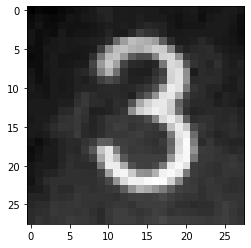

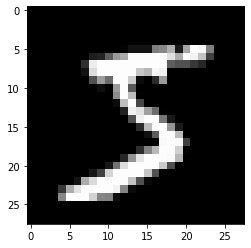

In [10]:
# 作圖看一下 METER 的資料與 MNIST 的資料長得如何
plt.figure()
plt.imshow(METER_X_train_shaped[0, :, :, 0], cmap='gray')

plt.figure()
plt.imshow(MNIST_X_train_shaped[0, :, :, 0], cmap='gray')

In [4]:
############ create model ############

model = Sequential()

model.add(Conv2D(16, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))

model.add(Conv2D(36, (5,5), activation="relu", padding="same", data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

tensorflow.keras.backend.clear_session()

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=['accuracy'])

In [ ]:
# Training
train_history = model.fit(
    x=X_train_add,  # METER + MNIST 的訓練 features 資料
    y=y_train_add_cat,  # METER + MNIST 的測試 features 資料
    validation_split=0.20,
    epochs=10,
    batch_size=600,
    verbose=1)

Train on 49528 samples, validate on 12383 samples
Epoch 1/10
49528/49528 [==============================] - 9s 187us/sample - loss: 2.6624 - accuracy: 0.5827 - val_loss: 0.2338 - val_accuracy: 0.9331
Epoch 2/10
30600/49528 [=================>............] - ETA: 3s - loss: 0.5161 - accuracy: 0.8321

In [14]:
# 正確率 
# 用 NMIST + METER training dataset 所訓練的模型，推論 NMIST + METER test dataset
test_loss, test_acc = model.evaluate(
    x=X_test_add,
    y=y_test_add_cat)
print('\nTest accuracy:', test_acc)

10637/10637 [==============================] - 1s 103us/sample - loss: 0.1549 - accuracy: 0.9529

Test accuracy: 0.95290023


In [15]:
# confusion matrix
y_test_add_pred = model.predict_classes(X_test_add)
pd.crosstab(y_test_add, y_test_add_pred, rownames=['True'], colnames=['Prediction'])

Prediction    0     1     2     3    4    5    6     7    8    9
True                                                            
0           973    64     0     1    0    0    4     1    1    0
1             0  1247     2     0    0    0    0     0    1    0
2             3    28  1087     0    1    1    0     6    1    1
3             0    62     0  1000    0   35    0     5    2    0
4             0    43     0     0  971   56    1     1    1    8
5             1    28     0     2    1  965    3     2    1    1
6             2    15     0     0    2   49  947     0    0    0
7             0     2     6     0    1    1    0  1012    2    4
8             3     1     4     2    0    1    2     1  955    5
9             1     8     0     0    9    4    0     2    6  979

In [16]:
# 效能: 測試資料集的正確率 
# 用 NMIST + METER training dataset 所訓練的模型，推論 METER test dataset
test_loss, test_acc = model.evaluate(
    x=METER_X_test_shaped,
    y=np.array(METER_y_test_cat))
print('\nTest accuracy:', test_acc)

637/637 [==============================] - 0s 116us/sample - loss: 1.8334 - accuracy: 0.4349

Test accuracy: 0.43485087


In [17]:
METER_y_test_pred = model.predict_classes(METER_X_test_shaped)
pd.crosstab(
    np.array(METER_y_test),
    METER_y_test_pred,
    rownames=['True'],
    colnames=['Prediction'])

Prediction    1   2  3   5
True                      
0            64   0  0   0
1           115   0  0   0
2            26  69  0   1
3            62   0  9  23
4            43   0  0  56
5            28   0  0  84
6            12   0  0  45

In [5]:
train_history = model.fit(
    x=METER_X_train_shaped,  # METER 的訓練 feature 資料
    y=METER_y_train_cat,  # METER 的訓練 label 資料
    validation_split=0.20,
    epochs=20,
    batch_size=600,
    verbose=1)

Train on 1528 samples, validate on 383 samples
Epoch 1/20
1528/1528 [==============================] - 1s 493us/sample - loss: 2.1848 - accuracy: 0.2284 - val_loss: 1.8808 - val_accuracy: 0.5718
Epoch 2/20
1528/1528 [==============================] - 0s 192us/sample - loss: 1.8579 - accuracy: 0.3527 - val_loss: 1.5618 - val_accuracy: 0.7833
Epoch 3/20
1528/1528 [==============================] - 0s 184us/sample - loss: 1.6454 - accuracy: 0.4359 - val_loss: 1.2714 - val_accuracy: 0.6815
Epoch 4/20
1528/1528 [==============================] - 0s 183us/sample - loss: 1.3642 - accuracy: 0.5602 - val_loss: 1.0226 - val_accuracy: 0.8799
Epoch 5/20
1528/1528 [==============================] - 0s 187us/sample - loss: 1.0891 - accuracy: 0.7029 - val_loss: 0.7412 - val_accuracy: 0.8773
Epoch 6/20
1528/1528 [==============================] - 0s 185us/sample - loss: 0.8338 - accuracy: 0.7997 - val_loss: 0.4952 - val_accuracy: 0.9321
Epoch 7/20
1528/1528 [==============================] - 0s 185us/

In [15]:
test_loss, test_acc = model.evaluate(
    x=METER_X_test_shaped,
    y=np.array(METER_y_test_cat))

print('\nTest accuracy:', test_acc)

637/637 [==============================] - 0s 106us/sample - loss: 0.0047 - accuracy: 1.0000

Test accuracy: 1.0


In [17]:
model.save(dataset_loc + 'meter_num_CNN_model_20200430.h5')